<blockquote> <h3> Project Title </h3> </blockquote>
<h1 style = 'color:#0C73D1;' > EDA & Machine Learning Approach For Predicting Titanic Survival </h1>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

%matplotlib inline

# Reset the mpl parameter to default
# plt.rcParams.update(mpl.rcParamsDefault)

# Set the margins
mpl.rcParams['axes.xmargin'] = 0.09
mpl.rcParams['axes.ymargin'] = 0.09

# Set figsize
sns.set(rc={'figure.figsize':(15,7)})

# Importing the warnings library to skip or ignore the warnings displayed in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')
print("Libraries are loaded.")

Libraries are loaded.


In [2]:
# File path's
gender = r"C:\Users\tejas\OneDrive\Desktop\Downloads\titanic\gender_submission.csv"
test = r"C:\Users\tejas\OneDrive\Desktop\Downloads\titanic\test.csv"
train = r"C:\Users\tejas\OneDrive\Desktop\Downloads\titanic\train.csv"

In [3]:
# Load train data into the dataframe
df_train = pd.read_csv(train)
display(df_train.head())
display(df_train.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Load test data into the dataframe
df_test = pd.read_csv(test)
display(df_test.head())
display(df_test.tail())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Merge Both Datasets

In [5]:
# Let's merge both the dataframe to one single dataframe
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
display(df.head())
display(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Data Exploration

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
print(f"Datasets contains {df.shape[0]} rows and {df.shape[1]} columnns.")

Datasets contains 1309 rows and 12 columnns.


#### Inferences
* Datasets contains 1309 rows and 12 columnns.

***

In [11]:
# Let's check variable type for all columns
df.dtypes.value_counts().rename_axis('variable_type').reset_index(name='count')

,variable_type,count
0,object,5
1,int64,4
2,float64,3


#### Inferences
* Datasets contains __5__ columns of __object__ type, __3__ columns of __integer__ type and __3__ columns of __float__ type.

***

In [12]:
# Let's display the descriptive statistics for all numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
# Let's display the descriptive statistics for all categorical columns
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


***

## Distribution of Null Values

In [14]:
# Compute The Distribution of Null Values
df_null = df.isnull().sum().rename_axis("column_names").reset_index(name="null_count")
df_null['null_percentage'] = df_null['null_count'].apply(lambda x: str(round((x/len(df))*100,2))+'%')
df_null

,column_names,null_count,null_percentage
0,PassengerId,0,0.0%
1,Survived,418,31.93%
2,Pclass,0,0.0%
3,Name,0,0.0%
4,Sex,0,0.0%
5,Age,263,20.09%
6,SibSp,0,0.0%
7,Parch,0,0.0%
8,Ticket,0,0.0%
9,Fare,1,0.08%


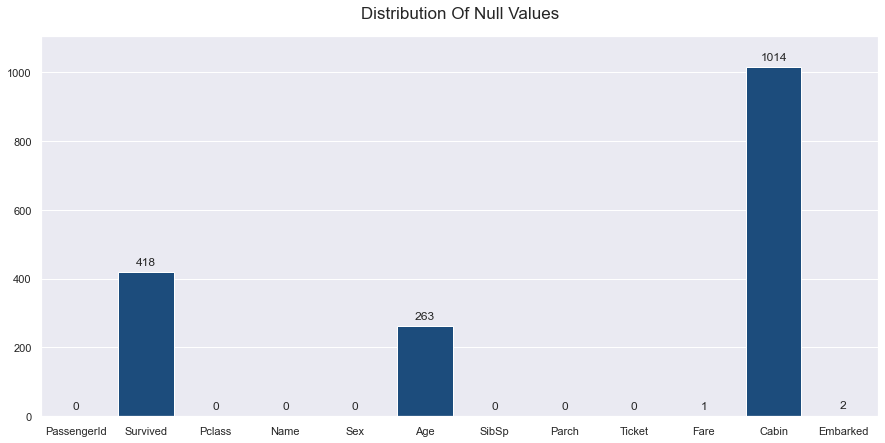

In [15]:
# Visualizing the distribution of null values
ax = sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values, ci=None, color='#0c4c8c')
ax.set_title(f'Distribution Of Null Values', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
plt.show()

We will skip __Survived__ column here because this is what we want to predict. We will deal with remaining columns.

#### Inferences
* Most of the __Null values__ are in the __Cabin__ column about __1014__ out of 1309, followed by __Survived__ column about __418__ and __Age__ column about __263 null values__.
* __Fare__ and __Embarked__ column have __1__ or __2 missing values__.

***

## Distribution of Unique Values

In [16]:
# Compute the distribution of unique values in each column
df.nunique().rename_axis("column_names").reset_index(name="distinct_count")

,column_names,distinct_count
0,PassengerId,1309
1,Survived,2
2,Pclass,3
3,Name,1307
4,Sex,2
5,Age,98
6,SibSp,7
7,Parch,8
8,Ticket,929
9,Fare,281


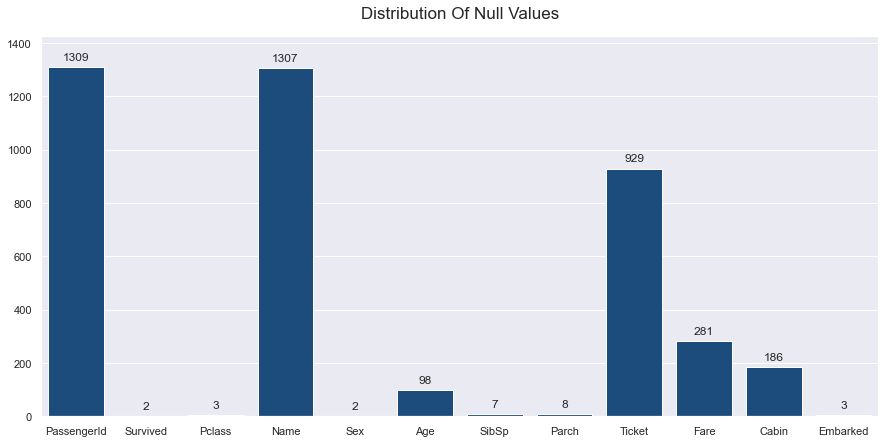

In [17]:
# Visualizing the distribution of null values
ax = sns.barplot(x=df.nunique().index, y=df.nunique().values, ci=None, color='#0c4c8c')
ax.set_title(f'Distribution Of Null Values', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
plt.show()

***

## Distribution of Duplicate Values

In [18]:
print(f"Duplicate values : {df.duplicated().sum()}")
print(f"Duplicate Percentage : {str(round((df.duplicated().sum()/len(df))*100, 2))+'%'}")

Duplicate values : 0
Duplicate Percentage : 0.0%


#### Inferences
* Datasets contains __no__ duplicate values.

***

# Correlation

In [19]:
# Let's display the correlation
df.drop('PassengerId', axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


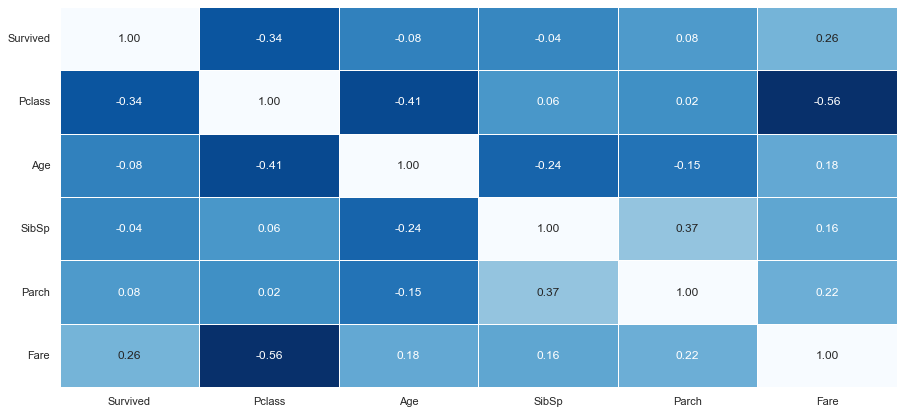

In [20]:
sns.heatmap(df.drop('PassengerId', axis=1).corr(), cmap='Blues_r', annot=True, fmt='.2f', linewidth=.5, cbar=None)
plt.yticks(rotation=0)
plt.show()

In [21]:
# Get only columns that have positve correlation with survived
df.drop('PassengerId', axis=1).corr()[df.corr()['Survived'] > 0][['Survived']]

,Survived
Survived,1.000000
Parch,0.081629
Fare,0.257307


#### Inferences
* Only __Age__, __Parch__ and __Fare__ have __positive correlation__ with target variable __Survived__.

***

In [22]:
# Let's drop three unnecessary columns Name, Tickets and Cabin
df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
print("Done")

Done


In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


***

### Distribution Of Values For Nominal Variable Or Categorical Variable

In [24]:
# function that automatically draw countplot and inferences 
def draw_countplots_with_inferences(dataframe):

    # Visualize the distribution of values in each column
    def make_countplot(column):
        print() # adding extra whitespace before proceeding
        ax = sns.countplot(column)
        ax.set_title(f'Distribution of Values In {column.name.title()} Column', fontdict={'size':17}, y=1.03)
        ax.bar_label(ax.containers[0], padding=5)
        ax.set_ylabel('count', labelpad=15, fontdict={'size':13})
        ax.set_xlabel(column.name.lower(), labelpad=15, fontdict={'size':13})
        plt.show()
    

    # Used to display html code in output field
    from IPython.core.display import HTML
    
    # generate references
    def draw_inferences(column):
        
        # compute value count for each category
        data = column.value_counts()

        # let's compute unique values in column
        unique_vals = list(data.sort_index().index.astype(str))

        # join unique values to make string from list
        unique_val_string = f"{', '.join(unique_vals[:-1])} & {unique_vals[-1]}" # for 1st html line

        # get indices and therir corresponding values
        indices, values = list(data.index[0:2].astype(str)), list(data.values[0:2])

        # join unique values to make string from list for remaining_values_string
        remaining_values_string = (' & '.join(data.index.astype(str)[1:3])) # for 2nd html line
        
        # Creating inferences in the HTML format
        
        # Heading for inferences or insights
        result = "<h4> Inferences </h4>"
        
        # for 1st html line - 
        result += f"<ul><li><b>{column.name.title()}</b> has <b>{len(unique_vals)}</b> unique values <b>{unique_val_string}</b>.</li>" 

        # 2nd html line - 
        
        # displaying corresponding values of the indices if categories are only two
        if len(unique_vals)  == 2:
            result += f"<li> Most of the values are <b>{indices[0]}</b> about <b>{values[0]}</b>, followed by <b>{indices[1]}</b> about <b>{values[1]}</b>.</li></ul>"
        else:
            result += f"<li> Most of the values are <b>{indices[0]}</b> about <b>{values[0]}</b>, followed by <b>{remaining_values_string}</b>.</li></ul>"

        # add line after each variable
        result += "<hr>" 

        # Display the result as HTML
        return display(HTML(result))        
    
    
    # Let's filter to get only categorical columns that have less than 10 unique values
    cat_columns = dataframe.nunique()[dataframe.nunique() < 12].index.tolist()

    # Iterating through each column that have less than 12 categories
    for column in cat_columns:
        column = dataframe[column]
        # this will draw the countplot
        make_countplot(column)
        # this will draw the insights from countplot
        draw_inferences(column)

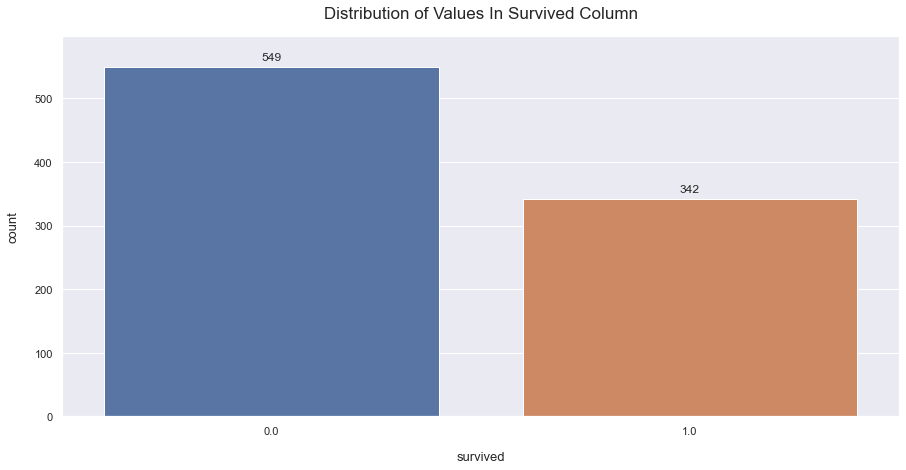

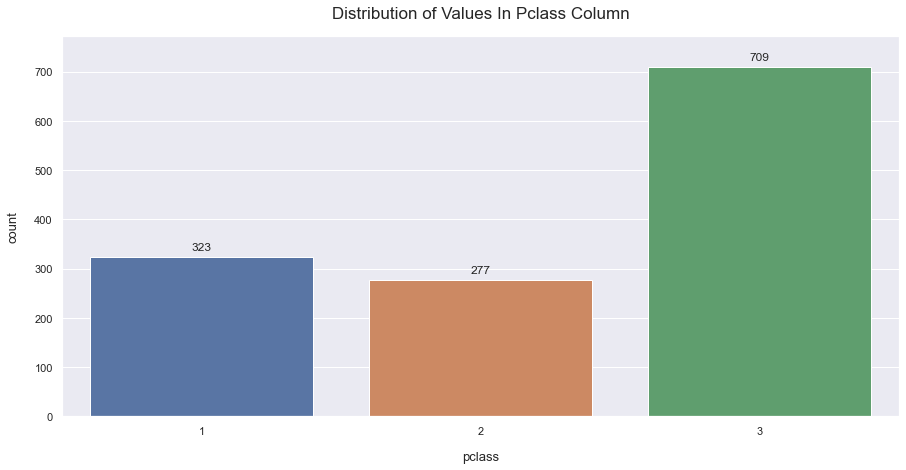

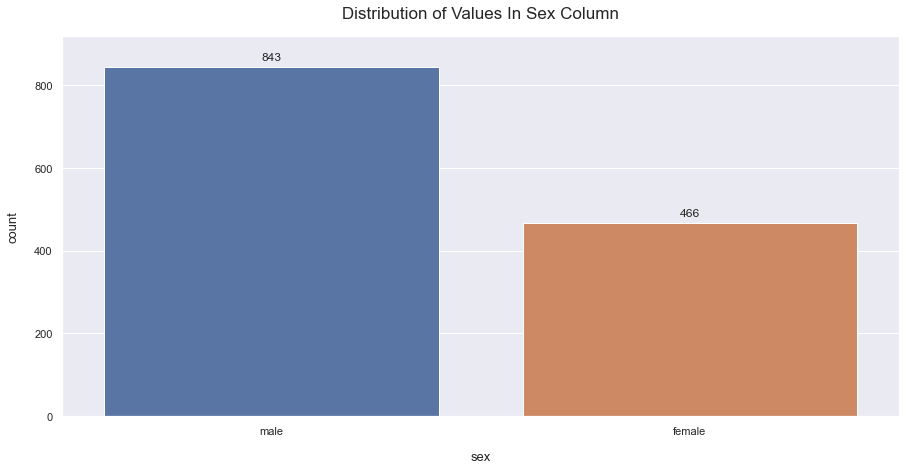

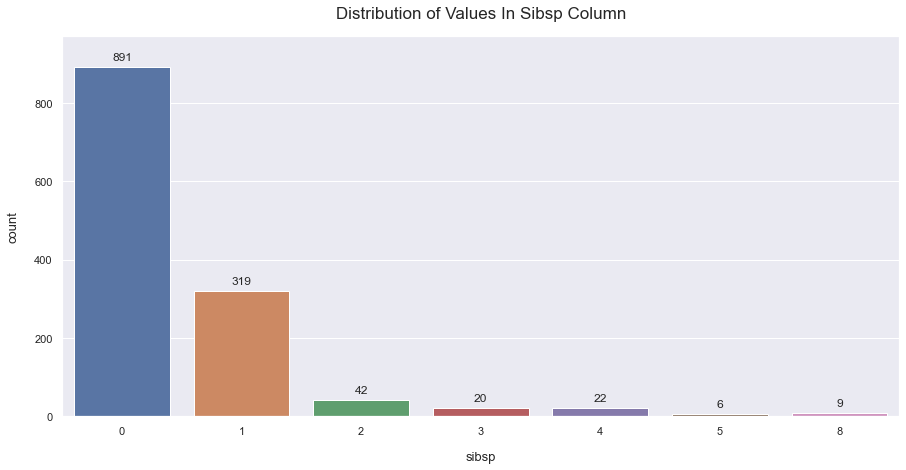

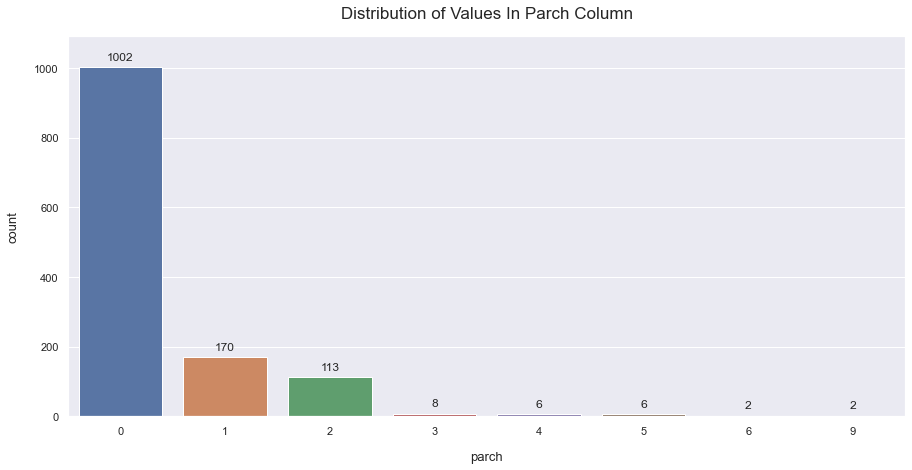

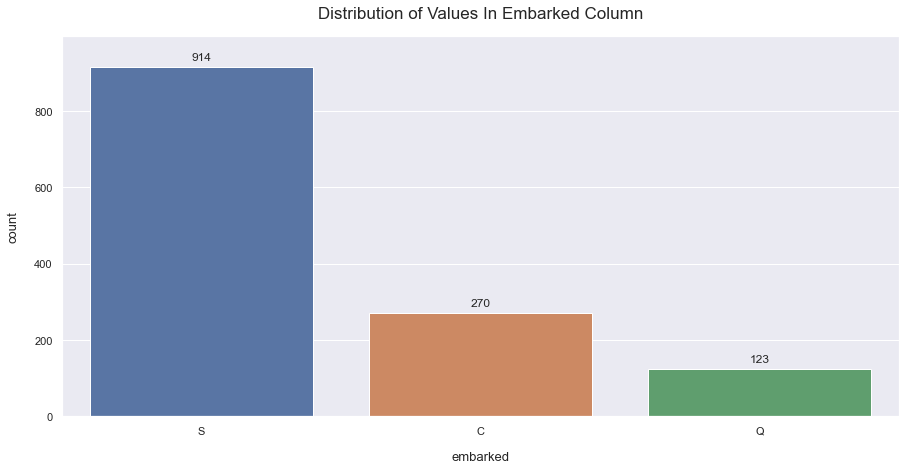

In [25]:
# Visualizing the distribution of all the columns
draw_countplots_with_inferences(df)

### Distribution of Values In Age Column - Continuous Numerical Variable

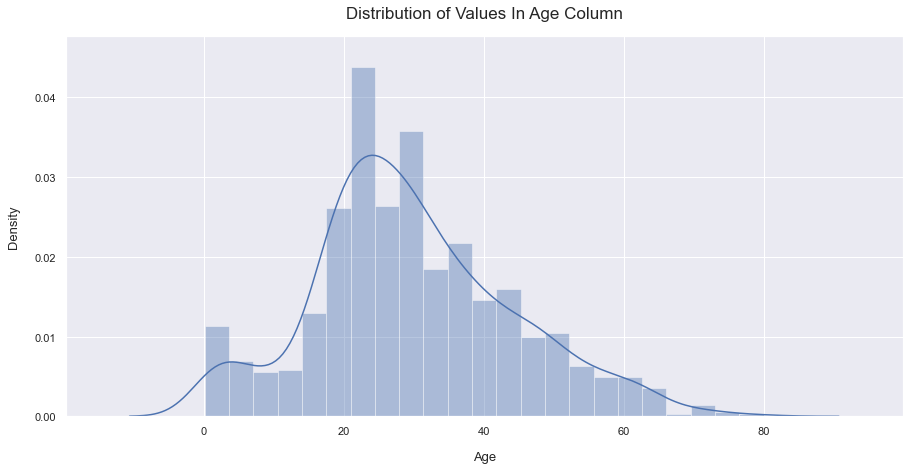

In [26]:
# Let's visualize the distribution of Age
ax = sns.distplot(df['Age'])
ax.set_title(f'Distribution of Values In Age Column', fontdict={'size':17}, y=1.03)
ax.set_ylabel('Density', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Age', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
1. __Most of the passengers__ fall within the __age range__ of __18__ to __45__, with approximately __677__ passengers.
2. The __age__ values in the dataset __range__ from __2 months__ to __80 years__.

***

### Distribution of Values In Fare Column - Continuous Numerical Variable

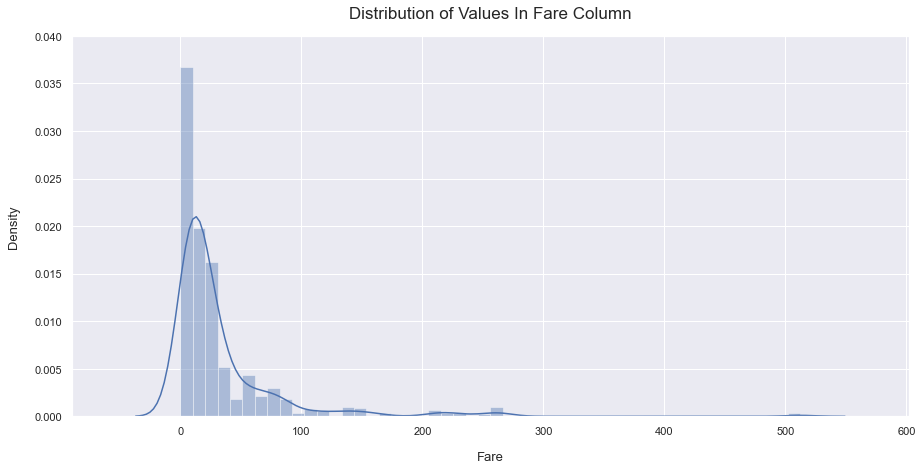

In [27]:
# Let's visualize the distribution of remaining columns 
ax = sns.distplot(df['Fare'])
ax.set_title(f'Distribution of Values In Fare Column', fontdict={'size':17}, y=1.03)
ax.set_ylabel('Density', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Fare', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
1. __Most of the passenger fares__ fall within the __range__ of __0__ to __100__, with approximately __1308__ passengers having fares in this range.
2. The __passenger fares__ in the dataset range from __0__ to __512.32__.

Right-skewed data refers to data where the majority of the values are located on the left-hand side of the distribution, with a long tail extending towards the right-hand side. This means that there are relatively few data points with high values, and many data points with low values.

We don't need to transform the data if we are not using model like linear regression and logistic regression.

***

### Visualizing The Distribution of Values In Age Column Using Boxplot

In [28]:
# function that automatically draw barplot and inferences 
def draw_boxplot_with_inferences(dataframe):
    # check skewness of the data distribution
    def check_skewness(column):
        Q1, Q2, Q3 = column.quantile([0.25, 0.50, 0.75])
        if Q2-Q1 < Q3-Q2:
            return "The <b>median</b> is <b>close</b> to the <b>bottom</b> of the <b>box</b> or <b>close</b> to the <b>first quartile</b> means the data is <b>positively</b> skewed or skewed to the <b>right</b>."
        elif Q2-Q1 > Q3-Q2:
            return "The <b>median</b> is <b>close</b> to the <b>top</b> of the <b>box</b> or <b>close</b> to the <b>third quartile</b> means the data is <b>negatively</b> skewed or skewed to the <b>left</b>."
        else:
            return "The <b>median</b> is located at the <b>middle</b> or <b>center</b> of the <b>box</b> in a box plot, it suggests that the data is <b>symmetrically</b> distributed around the <b>median</b>."

    # get total number of outliers
    def check_outliers(column):
        q1, q3 = column.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - 1.5*(iqr)
        upper = q3 + 1.5*(iqr)
        outliers = column[(column < lower) | (column > upper)].count()
        return outliers

    # visualizing data using boxplots
    def make_boxplot(column):
        print() # add extra whitespace before plot
        ax = sns.boxplot(y = column)
        ax.set_title(f'Distribution of Values In {column.name.title()} Column', fontdict={'size':17}, y=1.03)
        ax.set_ylabel(column.name.lower(), labelpad=15, fontdict={'size':13})
        plt.show()
        print() # add extra whitespace before plot

    # generate_inferences for each column
    def draw_inferences(column):
        # get column name in lowercase
        column_name = column.name.lower()
        # compute 5 number summary
        summary = column.describe()['min':'max'].round(2).to_dict()
        # check the skewness of the data distribution
        skewness_string = check_skewness(column)
        # check number of outliers
        outliers = check_outliers(column)
        # compute the spread or values within Inter quartile range
        q1, q3 = column.quantile([0.25, 0.75])
        vals_under_iqr = column[(column >= q1) & (column <= q3)].count()

        # Used to display html code in the output
        from IPython.core.display import HTML
        
        # Creating inferences in the HTML format
        
        # Heading for inferences or insights
        result = "<h4> Inferences </h4>"
        result += f"<ul><li>The <b>Five-Number Summary</b> of the <b>{column.name.title()}</b> data is as follows : the <b>minimum</b> {column_name} is <b>{summary['min']}</b>, the <b>1st quartile</b> is <b>{summary['25%']}</b>, the <b>median</b> is <b>{summary['50%']}</b>, the <b>3rd quartile</b> is <b>{summary['75%']}</b>, and the <b>maximum</b> {column_name} is <b>{summary['max']}</b>.</li>"
        result += f"<li>{skewness_string}</li>"
        result += f"<li>Out of the total values, there are <b>{vals_under_iqr}</b> values that fall within the <b>Interquartile Range (IQR)</b>, which is the range of values between the 1st Quartile and the 3rd Quartile.</li>"
        result += f"<li>There are <b>{outliers}</b> values in the <b>{column_name}</b> column that are considered <b>outliers</b>.</li></ul>"
        # add a line after each variable
        result += "<hr>" 

        # Display the result as HTML
        return display(HTML(result))    
    
    # Let's filter to get only categorical columns that have more than 10 unique values
    columns = dataframe.nunique()[dataframe.nunique() > 12].index 
    
    # filter which column contains id or unique values most
    id_columns = [i for i in dataframe.columns if dataframe[i].nunique() == len(dataframe)] 

    # Iterating through each column that have less than 12 categories
    for column in columns:
        # skiping the id like columns
        if column not in id_columns:
            column = dataframe[column]
            # this will draw the countplot
            make_boxplot(column) 
            # this will draw the insights from countplot
            draw_inferences(column)
            

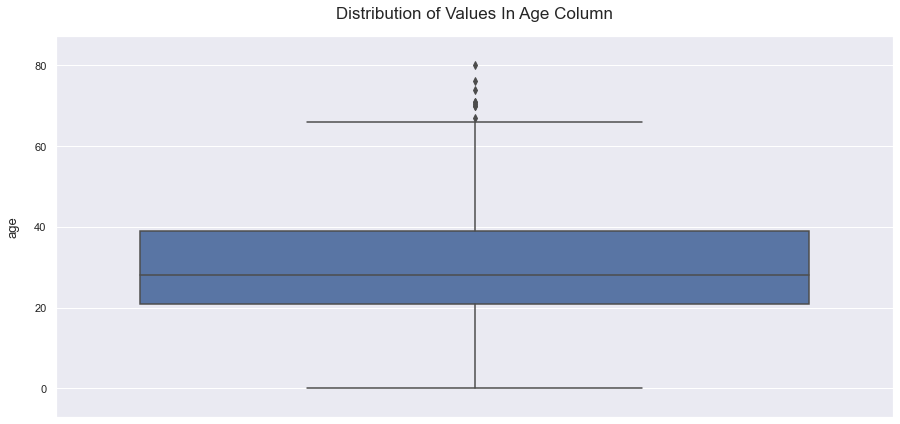

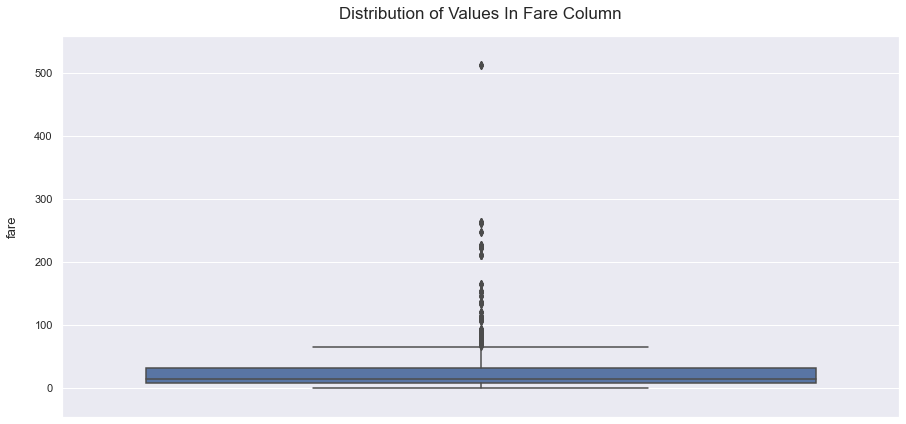

In [29]:
# Visualizing the distribution of all the columns
draw_boxplot_with_inferences(df)

### Distribution of Total Survived Classified by Gender

In [30]:
# let's compute the average survival for male and females
df[['Survived', 'Sex']][df['Survived'].notnull()].groupby('Sex').mean().round(2)

,Survived
Sex,
female,0.74
male,0.19


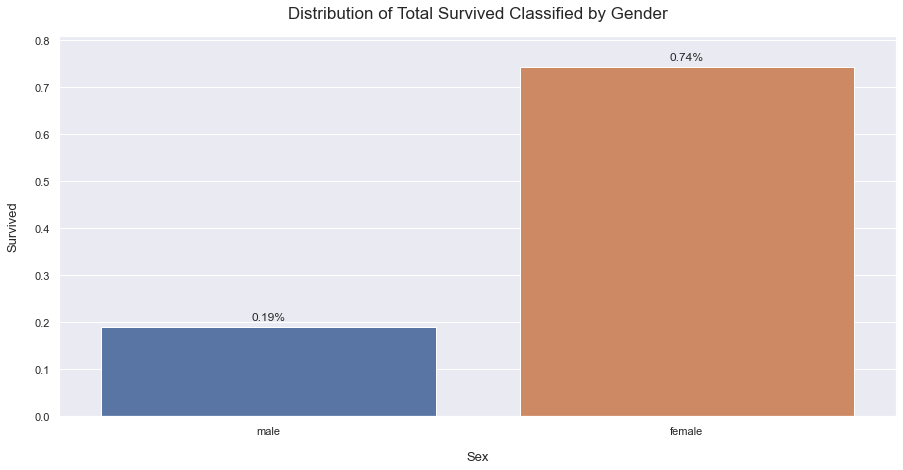

In [31]:
# let's visualize the distribution of total survived classified by gender
ax = sns.barplot(x='Sex', y='Survived', data=df, ci=None)
ax.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
ax.set_title(f'Distribution of Total Survived Classified by Gender', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Sex', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* The __majority of the surviving__ passengers were __women__, accounting for approximately __74%__ of all female survivors. Only __19%__ of the __men__ survived the disaster.

***

### Distribution of Survived or Not Survived Classified by Gender

In [32]:
# Let's see how many male and female survived
df[['Survived', 'Sex']].pivot_table(index='Survived', columns='Sex', aggfunc=len).rename(index={0.0:'Not Survived', 1.0:'Survived'})

Sex,female,male
Survived,,
Not Survived,81,468
Survived,233,109


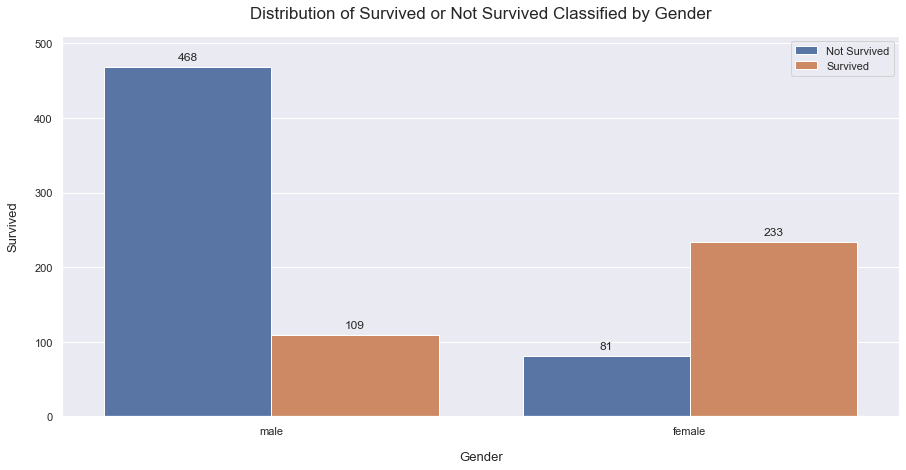

In [33]:
# let's visualize the distribution of total survived classified by gender
ax = sns.countplot(x='Sex', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Gender', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Gender', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)   
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
* Out of all the __male__ passengers, approximately __468 did not survive__ while only __109 survived__. In comparison, out of all the __females__, only __81 did not survive__ and a total of __233 females survived__.

***

### Distribution of Survived or Not Survived Classified by Passenger class

In [34]:
df[['Survived', 'Pclass']].pivot_table(columns='Survived', index='Pclass', aggfunc=len).rename(columns={0.0:'Not Survived', 1.0:'Survived'})

Survived,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


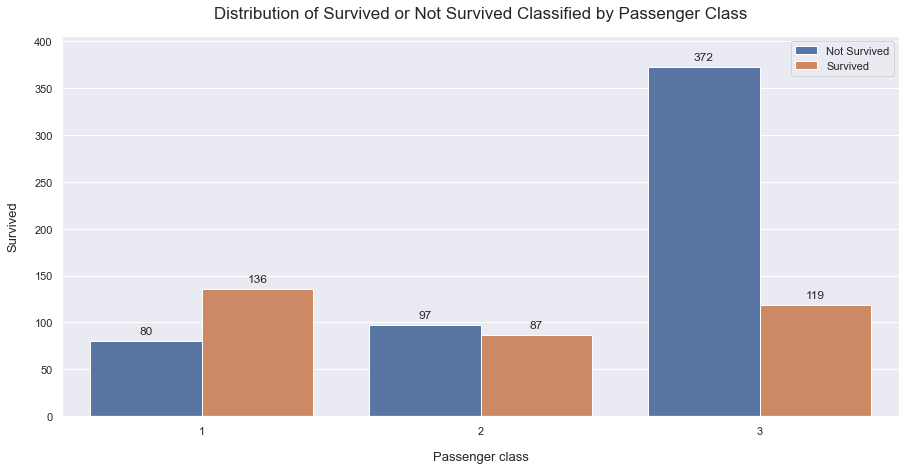

In [35]:
# let's visualize the distribution of total survived classified by passenger class
ax = sns.countplot(x='Pclass', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Passenger Class', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Passenger class', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)    
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
1. __Most of the passengers__ who __did not survive__ were in __passenger class 3__, about __372__ passengers __did not survive__ and only __119__ passengers __survived__ in that __class__.
2. __Passenger class 1__ had the __highest__ number of __survivors__, with approximately __136__ passengers __surviving__ and __80__ passengers __not surviving__ in that __class__.

***

### Distribution of Survived or Not Survived Classified by Siblings and Spouses

In [36]:
df[['Survived', 'SibSp']].pivot_table(columns='Survived', index='SibSp', aggfunc=len).rename(columns={0.0:'Not Survived', 1.0:'Survived'})

Survived,Not Survived,Survived
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


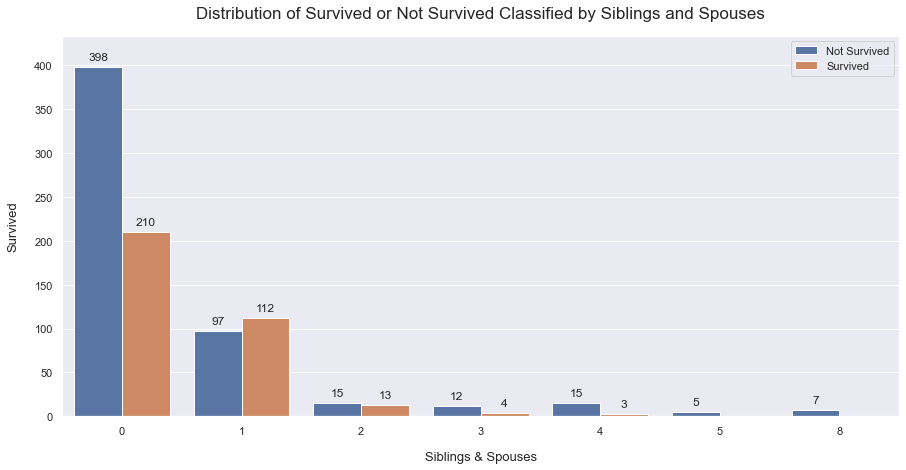

In [37]:
# let's visualize the distribution of total survived classified by siblings and spouses
ax = sns.countplot(x='SibSp', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Siblings and Spouses', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Siblings & Spouses', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)    
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
1. Most of the passengers who __did not survive__ had __no siblings or spouses__ onboard, comprising approximately __398__ passengers. Only __210__ passengers who __had no siblings or spouses__ onboard __survived__.
2. __Passengers__ who had __one sibling or spouse__ onboard were __survived the most__ compared to those __who did not survive__. Approximately __112__ passengers with __one sibling or spouse survived__, while __97__ passengers with __one sibling or spouse did not survive__.

***

### Distribution of Survived or Not Survived Classified by Parents or Children

In [38]:
df[['Survived', 'Parch']].pivot_table(columns='Survived', index='Parch', aggfunc=len).rename(columns={0.0:'Not Survived', 1.0:'Survived'})

Survived,Not Survived,Survived
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


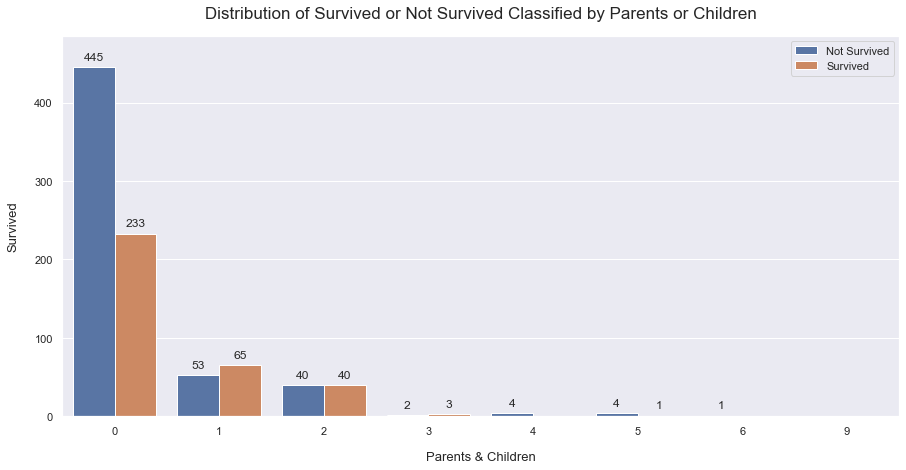

In [39]:
# let's visualize the distribution of total survived classified by parents or children 
ax = sns.countplot(x='Parch', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Parents or Children', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Parents & Children', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)    
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
1. Most of the passengers who __did not survive__ had __no parents or children__ onboard, comprising approximately __445__ passengers. Only __233__ passengers who __had no parents or children__ onboard __survived__.
2. __Passengers__ who had __one parents or children__ onboard were __survived the most__ compared to those __who did not survive__. Approximately __65__ passengers with __one sibling or spouse survived__, while __53__ passengers with __one parents or children did not survive__.
3. __Passengers__ who had __two parents or children__ onboard had an __equal__ number of __survivors__ and __non-survivors__, with approximately __40 passengers surviving__ and __40 passengers not surviving__.

***

### Distribution of Survived or Not Survived Classified by Port of Embarkation

In [40]:
df[['Survived', 'Embarked']].pivot_table(columns='Survived', index='Embarked', aggfunc=len).rename(columns={0.0:'Not Survived', 1.0:'Survived'})

Survived,Not Survived,Survived
Embarked,,
C,75,93
Q,47,30
S,427,217


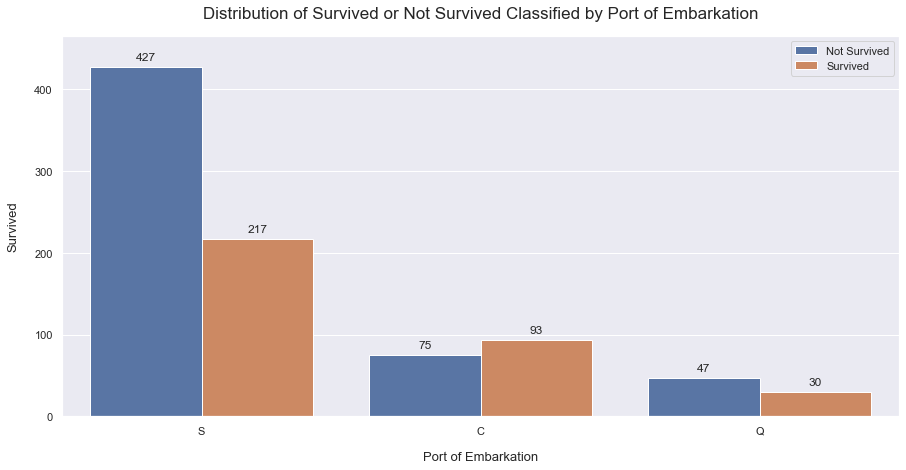

In [41]:
# let's visualize the distribution of total survived classified by port of embarkation
ax = sns.countplot(x='Embarked', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Port of Embarkation', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Port of Embarkation', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)    
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
1. __Most of the passengers__ who __did not survive__ were from the __S Port of Embarkation__, with approximately __427__ passengers. Only __217__ passengers __survived__ from that Port of Embarkation.
2. In the __C Port of Embarkation__, __93__ passengers __survived__ compared to about __75__ passengers who __did not survive__.

***

### Distribution of Survived or Not Survived Classified by Age Groups

In [42]:
# Let's create bin lables for age groups
labels = []
for key, val in (zip(np.arange(0, 90, 10), np.arange(10, 100, 10))):
    labels.append(f"{key}-{val}")

print(f"Bin Labels : {labels}")

# Let's create bin values for age groups
bins = np.arange(0, 90, 10).tolist()
print(f"Bins : {bins}")

# let's make age groups using bins and bin labels
df['Age_Groups'] = pd.cut(df['Age'], labels=labels[0:-1], bins=bins)

Bin Labels : ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
Bins : [0, 10, 20, 30, 40, 50, 60, 70, 80]


In [43]:
df[['Age', 'Age_Groups']].head(2)

,Age,Age_Groups
0,22.0,20-30
1,38.0,30-40


In [44]:
df[['Survived', 'Age_Groups']].pivot_table(columns='Survived', index='Age_Groups', aggfunc=len).rename(columns={0.0:'Not Survived', 1.0:'Survived'})

Survived,Not Survived,Survived
Age_Groups,,
0-10,26,38
10-20,71,44
20-30,146,84
30-40,86,69
40-50,53,33
50-60,25,17
60-70,13,4
70-80,4,1


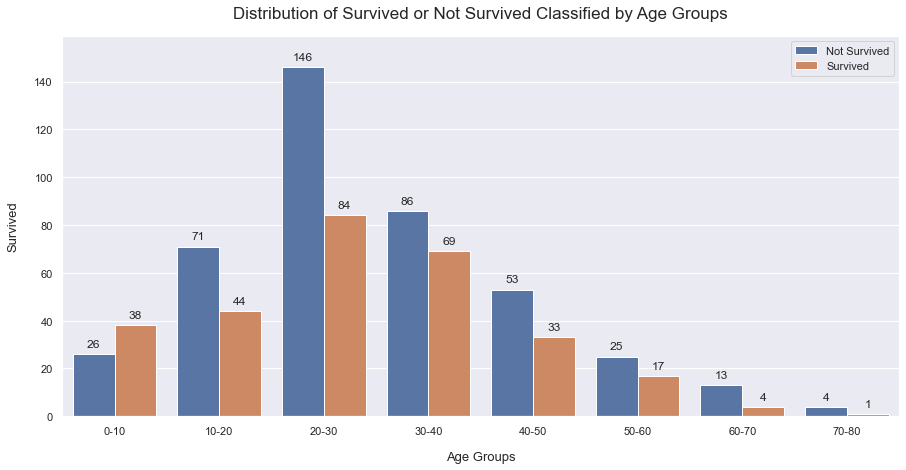

In [45]:
# let's visualize the distribution of total survived classified by age groups
ax = sns.countplot(x='Age_Groups', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Age Groups', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Age Groups', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)    
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
1. __Most of the passengers__ who __did not survive__ were in the __20-30__ age group, with approximately __146__ passengers, compared to only __84__ who __survived__ in that age group.
2. __86__ passengers who __did not survive__ were in the __30-40__ age group, compared to __69__ who __survived__.

***

### Distribution of Survived or Not Survived Classified by Passenger Fare Groups

In [46]:
# Let's create bin lables for Fare groups
labels = []
for key, val in (zip(np.linspace(0, 600, num=7), np.linspace(100, 700, num=7))):
    labels.append(f"{int(key)}-{int(val)}")

print(f"Bin Labels : {labels}")

# Let's create bin values for age groups
bins = np.linspace(0, 600, num=7).tolist()
print(f"Bins : {bins}")

# let's make age groups using bins and bin labels
df['Fare_Groups'] = pd.cut(df['Fare'], labels=labels[0:-1], bins=bins)

Bin Labels : ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700']
Bins : [0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0]


In [47]:
df[['Fare', 'Fare_Groups']].head(2)

,Fare,Fare_Groups
0,7.2500,0-100
1,71.2833,0-100


In [48]:
df[['Survived', 'Fare_Groups']].pivot_table(columns='Survived', index='Fare_Groups', aggfunc=len).rename(columns={0.0:'Not Survived', 1.0:'Survived'})

Survived,Not Survived,Survived
Fare_Groups,,
0-100,521.0,302.0
100-200,8.0,25.0
200-300,6.0,11.0
500-600,NaN,3.0


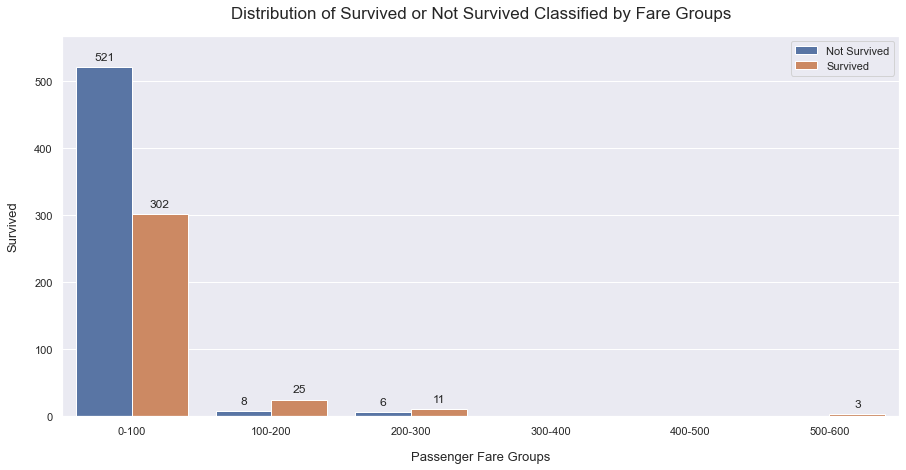

In [49]:
# let's visualize the distribution of total survived classified by passenger fare groups
ax = sns.countplot(x='Fare_Groups', data=df, hue='Survived')
ax.set_title(f'Distribution of Survived or Not Survived Classified by Fare Groups', fontdict={'size':17}, y=1.03)
ax.set_xlabel('Passenger Fare Groups', labelpad=15, fontdict={'size':13})
ax.set_ylabel('Survived', labelpad=15, fontdict={'size':13})
for container in ax.containers:
    ax.bar_label(container, padding=5)    
plt.legend(['Not Survived', 'Survived'], loc=1)
plt.show()

#### Inferences
1. Most of the passengers who __did not survive__ had a __passenger fare__ of __0-100__, with approximately __521__ passengers, compared to only __302__ who __survived__ in that __passenger fare group__.
2. There were __no passenger__ who had __300-400__ or __400-500__ passenger fare.

***

###  Data Cleaning - Dealing With NaN Values

In [50]:
# We will skip survived column here because surived column is our target variable
for name in df.drop('Survived', axis=1).columns:
    if df[name].isnull().sum() > 0:
        if df[name].dtypes in ['int64', 'float64']:
            df[name].fillna(df[name].median(), inplace=True)
            print(f"In {name} column, we have filled {df[name].median()} in place of NaN values.")
        else:
            df[name].fillna(df[name].mode()[0], inplace=True)
            print(f"In {name} column, we have filled '{df[name].mode()[0]}' in place of NaN values.")
print("Finished, imputing NaN values.")

In Age column, we have filled 28.0 in place of NaN values.
In Fare column, we have filled 14.4542 in place of NaN values.
In Embarked column, we have filled 'S' in place of NaN values.
In Age_Groups column, we have filled '20-30' in place of NaN values.
In Fare_Groups column, we have filled '0-100' in place of NaN values.
Finished, imputing NaN values.


***

# Feature Engineering

In [51]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Groups,Fare_Groups
0,1,0.0,3,male,22.0,1,0,7.2500,S,20-30,0-100
1,2,1.0,1,female,38.0,1,0,71.2833,C,30-40,0-100
2,3,1.0,3,female,26.0,0,0,7.9250,S,20-30,0-100
3,4,1.0,1,female,35.0,1,0,53.1000,S,30-40,0-100
4,5,0.0,3,male,35.0,0,0,8.0500,S,30-40,0-100


In [52]:
df.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
Age_Groups     category
Fare_Groups    category
dtype: object

In [53]:
# converting dtypes from category to object
df['Age_Groups'] = df['Age_Groups'].astype('object')
df['Fare_Groups'] = df['Fare_Groups'].astype('object')

#### Label Encoding / Mapping 

In [54]:
df[['female', 'male']] = pd.get_dummies(df['Sex'])

df[['C', 'Q', 'S']] = pd.get_dummies(df['Embarked'])

df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [55]:
df_age = pd.get_dummies(df['Age_Groups']).add_prefix('Age_Group(').add_suffix(')')
df_fare = pd.get_dummies(df['Fare_Groups']).add_prefix('Fare_Groups(').add_suffix(')')

# concatenating all the dataframes
df = pd.concat([df, df_age, df_fare], axis=1)

# Let's drop Age_Groups and Fare_Groups because they were just for visualization
df.drop(['Age_Groups', 'Fare_Groups'], axis=1, inplace=True)

In [56]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
0,1,0.0,3,22.0,1,0,7.2500,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2,1.0,1,38.0,1,0,71.2833,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,4,1.0,1,35.0,1,0,53.1000,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,5,0.0,3,35.0,0,0,8.0500,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,28.0,0,0,8.0500,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1305,1306,NaN,1,39.0,0,0,108.9000,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1306,1307,NaN,3,38.5,0,0,7.2500,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1307,1308,NaN,3,28.0,0,0,8.0500,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [57]:
# Standardizing the Age and Fare data
df['Age'] = df['Age']/df['Age'].max()
df['Fare'] = df['Fare']/df['Fare'].max()

In [58]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
0,1,0.0,3,0.275,1,0,0.014151,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2,1.0,1,0.475,1,0,0.139136,1,0,1,...,0,1,0,0,0,0,1,0,0,0


Split the data into training and testing subset

In [59]:
# training data
train = df.iloc[:len(df_train), :] 
display(train.head(2))

# testing data
test = df.iloc[len(df_train):, :]
display(test.head(2))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
0,1,0.0,3,0.275,1,0,0.014151,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2,1.0,1,0.475,1,0,0.139136,1,0,1,...,0,1,0,0,0,0,1,0,0,0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
891,892,NaN,3,0.43125,0,0,0.015282,0,1,0,...,0,1,0,0,0,0,1,0,0,0
892,893,NaN,3,0.58750,1,0,0.013663,1,0,0,...,0,0,1,0,0,0,1,0,0,0


Let's split training data into training and testing subset

In [60]:
# features or independent variables
X = train.drop(['PassengerId','Survived'], axis=1)
display(X.head(2))

# target or dependent variables
y = train[['Survived']] 
display(y.head(2))

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
0,3,0.275,1,0,0.014151,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1,0.475,1,0,0.139136,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


,Survived
0,0.0
1,1.0


In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass                891 non-null    int64  
 1   Age                   891 non-null    float64
 2   SibSp                 891 non-null    int64  
 3   Parch                 891 non-null    int64  
 4   Fare                  891 non-null    float64
 5   female                891 non-null    uint8  
 6   male                  891 non-null    uint8  
 7   C                     891 non-null    uint8  
 8   Q                     891 non-null    uint8  
 9   S                     891 non-null    uint8  
 10  Age_Group(0-10)       891 non-null    uint8  
 11  Age_Group(10-20)      891 non-null    uint8  
 12  Age_Group(20-30)      891 non-null    uint8  
 13  Age_Group(30-40)      891 non-null    uint8  
 14  Age_Group(40-50)      891 non-null    uint8  
 15  Age_Group(50-60)      8



------------------------------------------------------------
Logistic Regression
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.7982
- Cross Validation Average Score : 0.7946
------------------------------------------------------------




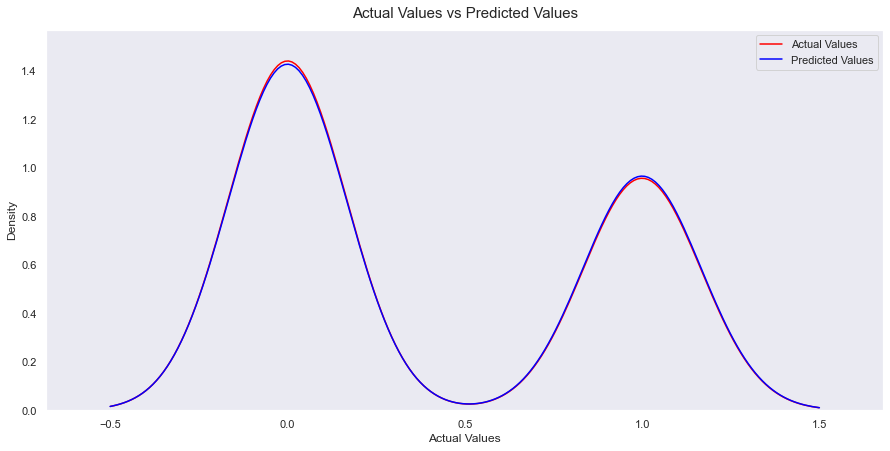



------------------------------------------------------------
DecisionTree Classifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.7309
- Cross Validation Average Score : 0.7745
------------------------------------------------------------




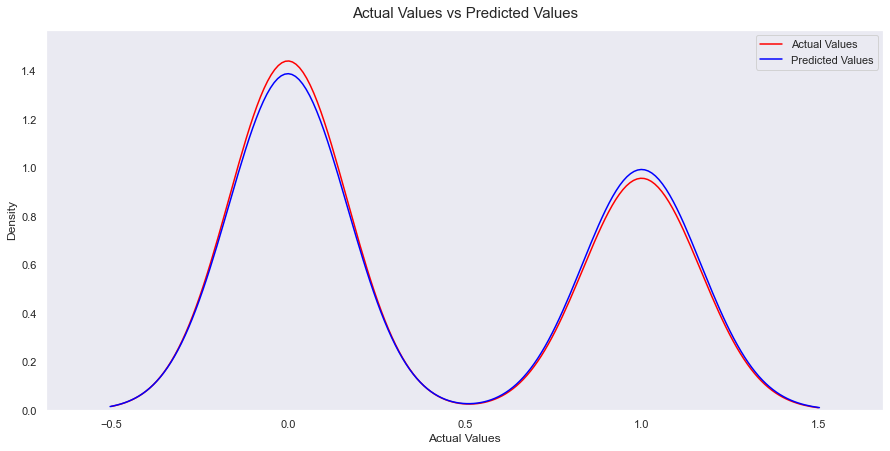



------------------------------------------------------------
Random Forest Classifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.7937
- Cross Validation Average Score : 0.8081
------------------------------------------------------------




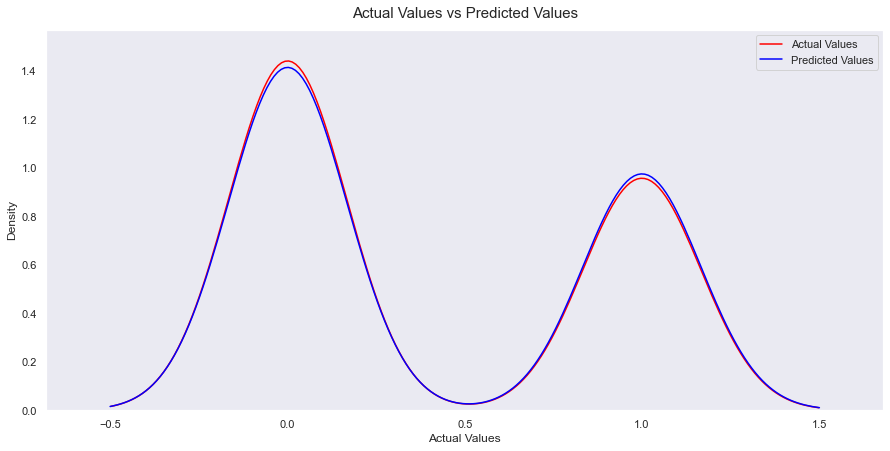



------------------------------------------------------------
AdaBoost Classifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.7848
- Cross Validation Average Score : 0.8025
------------------------------------------------------------




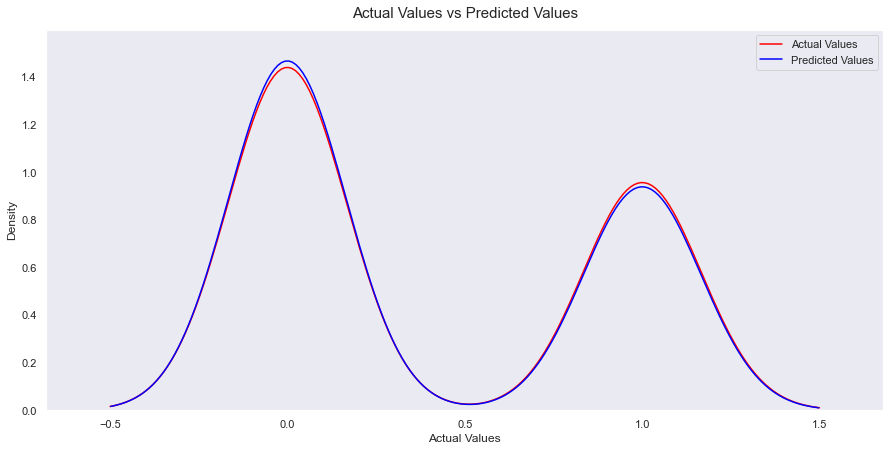



------------------------------------------------------------
Extra Trees Classifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.7803
- Cross Validation Average Score : 0.7969
------------------------------------------------------------




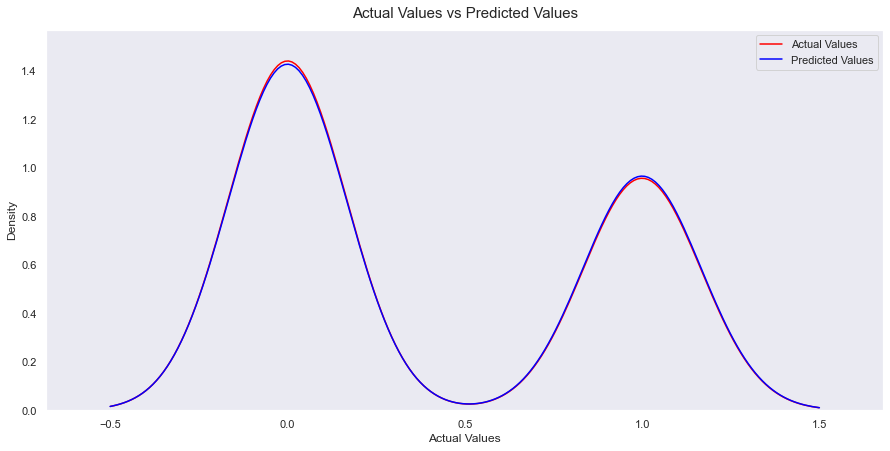



------------------------------------------------------------
XGBClassifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.7848
- Cross Validation Average Score : 0.8137
------------------------------------------------------------




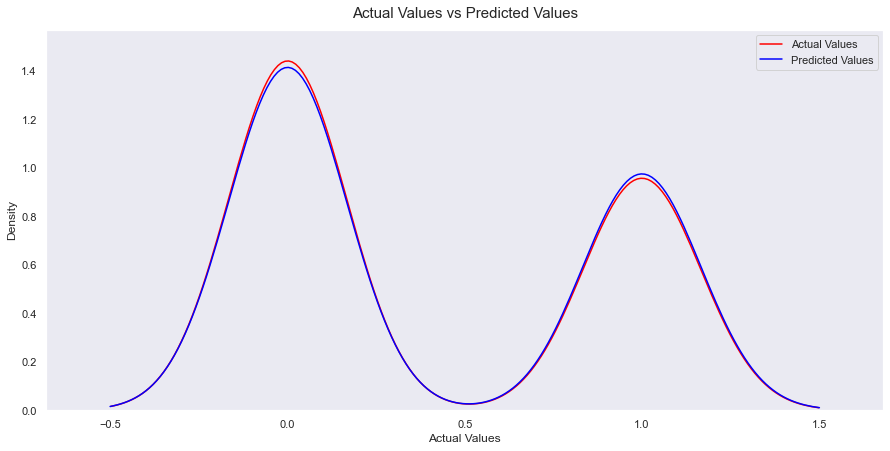



------------------------------------------------------------
LGBMClassifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.8027
- Cross Validation Average Score : 0.8294
------------------------------------------------------------




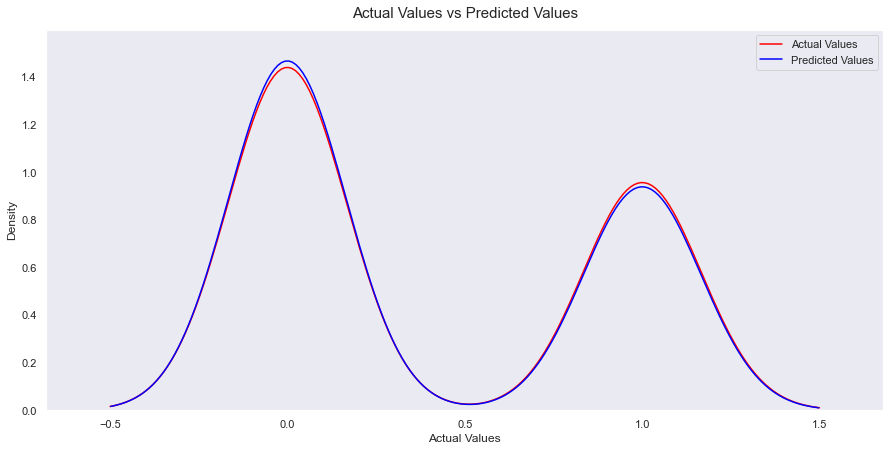



------------------------------------------------------------
CatBoost Classifier
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.8296
- Cross Validation Average Score : 0.8260
------------------------------------------------------------




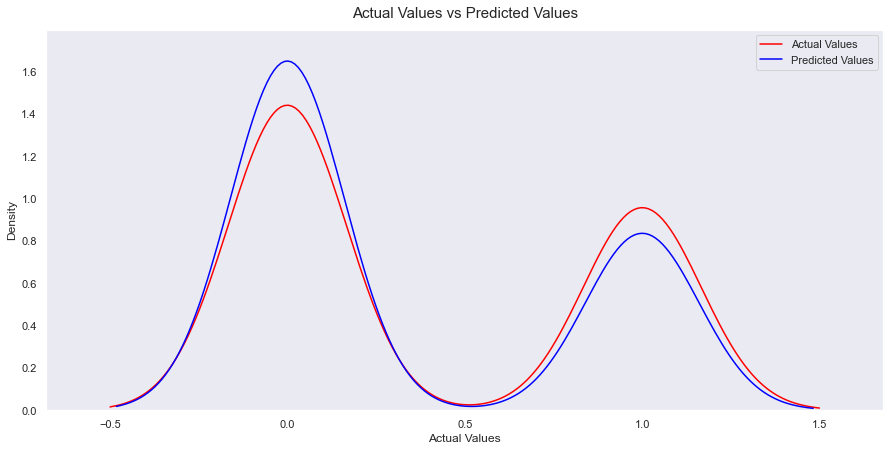



------------------------------------------------------------
Naive Bayes
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.6413
- Cross Validation Average Score : 0.6813
------------------------------------------------------------




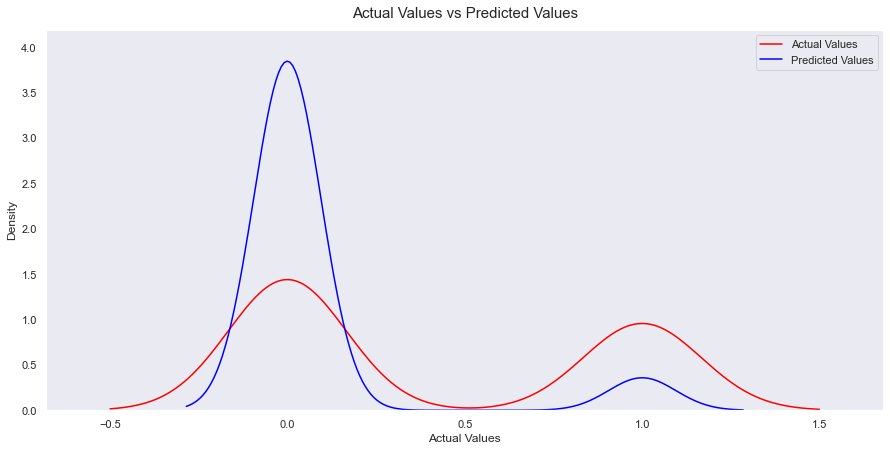



------------------------------------------------------------
Support Vector Machines
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.8206
- Cross Validation Average Score : 0.8260
------------------------------------------------------------




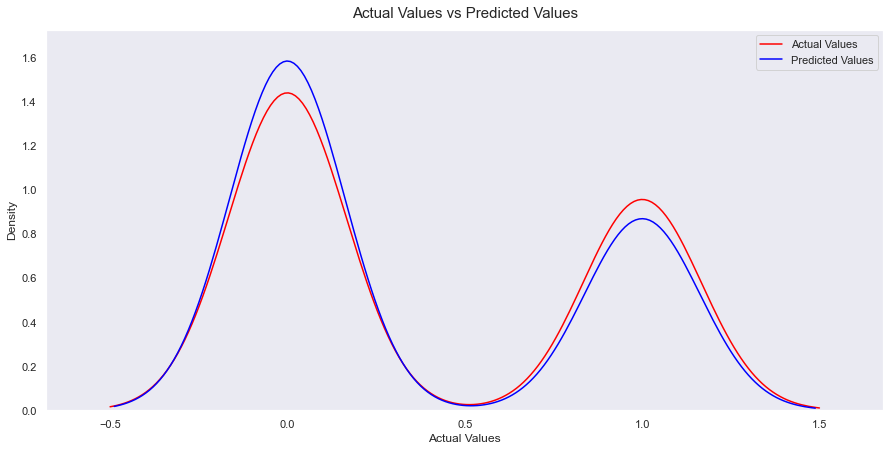



------------------------------------------------------------
Gradient Boosting Machines
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.8027
- Cross Validation Average Score : 0.8305
------------------------------------------------------------




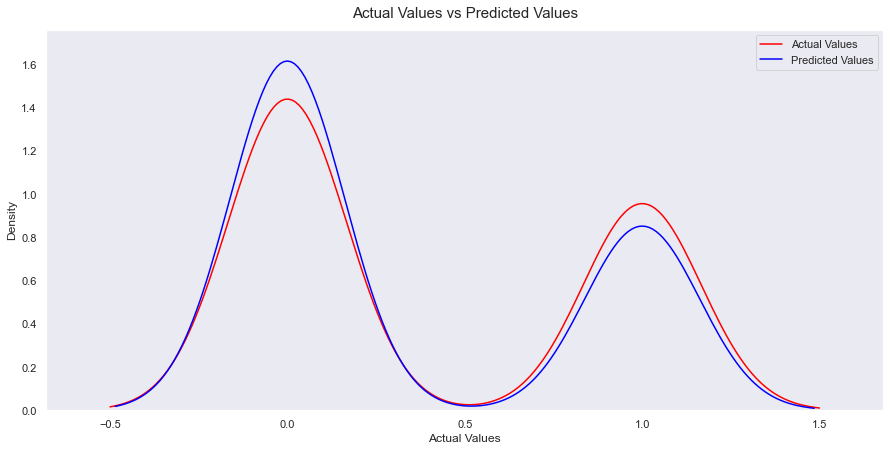



------------------------------------------------------------
Neural Networks
------------------------------------------------------------
Model Performance For Test Set
- Accuracy Score : 0.8117
- Cross Validation Average Score : 0.8160
------------------------------------------------------------




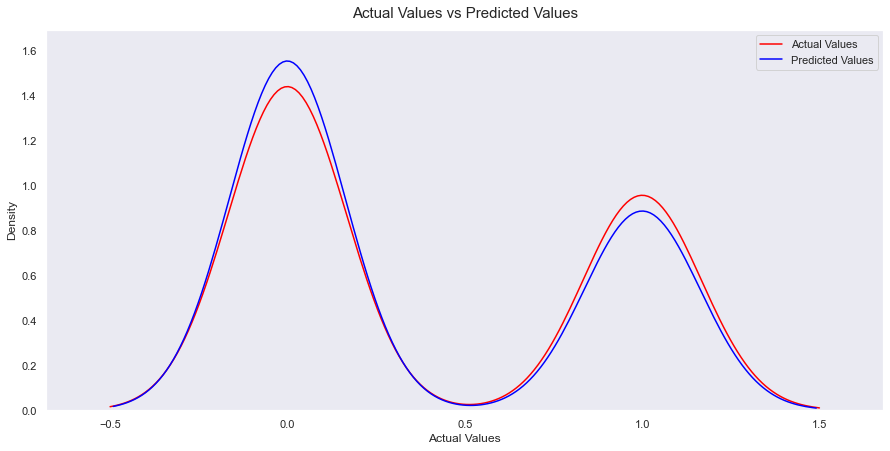

In [62]:
# ML Pipeline For Classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machines": SVC(),
    "Gradient Boosting Machines": GradientBoostingClassifier(),
    "Neural Networks": MLPClassifier()
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_list= []
accuracy_scores= []
cv_scores= []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # training an model
    
    # make prediction for test data
    y_pred = model.predict(X_test)
    
    # Save model names
    model_name = list(models.keys())[i]
    model_list.append(model_name)
    
    # Save accuracy scores
    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    
    # cross validation
    score = cross_val_score(model, X, y, cv=5)
    avg_score = np.mean(score)
    cv_scores.append(avg_score)

    print('\n') 
    print("----"*15)
    print(model_name)
    print("----"*15)
    
    print("Model Performance For Test Set")
    print("- Accuracy Score : {:.4f}".format(accuracy))
    print("- Cross Validation Average Score : {:.4f}".format(avg_score))
    
    print("----"*15)
    print('\n') 

    
    # Let's create the density plot for comparing the actual values vs predicted values
    ax1 = sns.distplot(y_test, hist=False, color='red', label='Actual Values')
    ax2 = sns.distplot(y_pred, hist=False, color='blue', label='Predicted Values', ax=ax1)
    plt.title('Actual Values vs Predicted Values', fontdict={'fontsize':15}, pad=12)
    plt.xlabel("Actual Values")
    plt.legend()
    plt.grid()
    plt.show()
    


In [63]:
# Let's display the data to see which model perform well
df_scores = pd.DataFrame(list(zip(model_list, accuracy_scores, cv_scores)), columns=['Model Name', 'Accuracy Score', 'CV Score']).sort_values(by=['CV Score'], ascending=False)
df_scores.reset_index(drop=True)

,Model Name,Accuracy Score,CV Score
0,Gradient Boosting Machines,0.802691,0.830538
1,LGBMClassifier,0.802691,0.829439
2,CatBoost Classifier,0.829596,0.826044
3,Support Vector Machines,0.820628,0.826031
4,Neural Networks,0.811659,0.815975
5,XGBClassifier,0.784753,0.813722
6,Random Forest Classifier,0.793722,0.808091
7,AdaBoost Classifier,0.784753,0.802523
8,Extra Trees Classifier,0.780269,0.796880
9,Logistic Regression,0.798206,0.794627


I have tested most of the model i have found Gradient Boosting Classifier is good in terms of accuracy.

### Model Training On Full Datasets

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X, y)

GradientBoostingClassifier()

Model training is done. Let's make predictions for testing datasets

In [65]:
test.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
891,892,NaN,3,0.43125,0,0,0.015282,0,1,0,...,0,1,0,0,0,0,1,0,0,0
892,893,NaN,3,0.58750,1,0,0.013663,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [66]:
# Droping PassengerId and Survived column from test datasets
X_test = test.drop(['PassengerId', 'Survived'], axis=1)
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Age_Group(20-30),Age_Group(30-40),Age_Group(40-50),Age_Group(50-60),Age_Group(60-70),Age_Group(70-80),Fare_Groups(0-100),Fare_Groups(100-200),Fare_Groups(200-300),Fare_Groups(500-600)
891,3,0.43125,0,0,0.015282,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
892,3,0.58750,1,0,0.013663,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [67]:
# let's make the predictions for test dataset
pred = model.predict(X_test)
pred[:5]

array([0., 0., 0., 0., 0.])

***

In [68]:
# loading the submission file into the dataframe
sub = pd.read_csv(gender)
sub.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [69]:
# let's save the prediction to submission dataframe
sub['Survived'] = pred

In [70]:
sub.head(2)

,PassengerId,Survived
0,892,0.0
1,893,0.0


In [71]:
# let's convert float to integers
sub['Survived'] = sub['Survived'].astype('int64')
sub.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [72]:
# Save submission to csv file
sub.to_csv('submission.csv', index=False)
print("Done")

Done


## Accuracy Score

Model Accuray Score on test datasets is __0.79425__ after submitting the submission to the kaggle titanic competition.

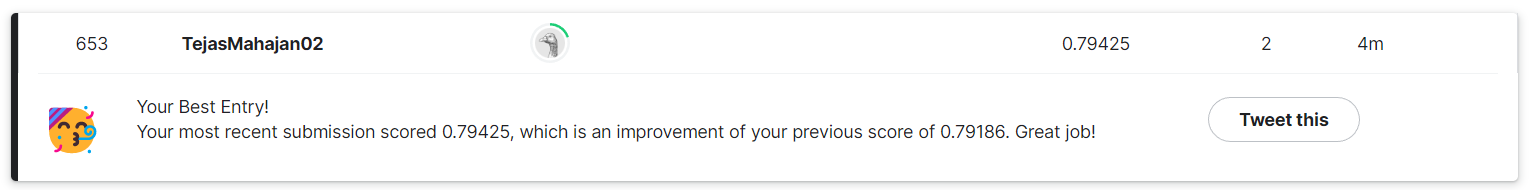

****